In [1]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from pandas import read_csv
from scipy.stats import zscore
import os, sys
import pandas as pd
from scipy.io import loadmat

import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

from experimentsetup import *
from architecturefns import *
from preprocessingandrecords import *

In [2]:
main_dir = "/home/ader003/DATASETS/mrt/"
stationnames = np.loadtxt(main_dir+"station_name_en.txt",dtype=str,delimiter='/n',encoding='utf-8-sig')
stationnamelist = ['Songshan Airport','Zhongshan Junior High School', 'Nanjing Fuxing', 'Zhongxiao Fuxing', 'Daan', 'Technology Building',
 'Liuzhangli', 'Linguang', 'Xinhai', 'Wanfang Hospital', 'Wanfang Community', 'Muzha', 'Taipei Zoo', 'Dazhi', 'Jiannan Road', 'Xihu',
 'Gangqian', 'Wende', 'Neihu', 'Dahu Park', 'Huzhou', 'Donghu', 'Nangang Software Park', 'Nangang Exhibition Center', 'Xiaobitan', 'Xindian',
 'Xindian District Office', 'Qizhang', 'Dapinglin', 'Jingmei', 'Wanlong', 'Gongguan', 'Taipower Building', 'Guting', 'Chiang Kai-shek Memorial Hall',
 'Xiaonanmen', 'Dingxi', 'Yongan Market', 'Jingan', 'Nanshijiao', 'National Taiwan University Hospital', 'Taipei Main Station', 'Zhongshan', 'Shuanglian',
 'Minquan West Road', 'Yuanshan', 'Jiantan', 'Shilin', 'Zhishan', 'Mingde', 'Shipai', "Qili'an", 'Qiyan', 'Beitou', 'Xinbeitou', 'Fuxinggang', 'Zhongyi',
 'Guandu', 'Zhuwei', 'Hongshulin', 'Tamsui','Dingpu', 'Yongning', 'Tucheng', 'Haishan', 'Far Eastern Hospital', 'Fuzhong', 'Banqiao',
 'Xinpu', 'Jiangzicui', 'Longshan Temple', 'Ximen', 'Shandao Temple', 'Zhongxiao Xinsheng', 'Zhongxiao Dunhua', 'Sun Yat-sen Memorial Hall',
 'Taipei City Hall', 'Yongchun', 'Houshanpi', 'Kunyang', 'Nangang', 'Xiangshan', 'Taipei 101/World Trade Center', 'Xinyi Anhe', 'Daan Park', 'Beimen', 'Songjiang Nanjing',
 'Taipei Arena', 'Nanjing Sanmin', 'Songshan','Fu Jen University','Xinzhuang','Touqianzhuang','Xianse Temple', 'Sanchong', 'Cailiao','Taipei Bridge', 'Daqiaotou',
 'Zhongshan Elementary School','Xingtian Temple', 'Dongmen','Luzhou','Sanmin Senior High School','St. Ignatius High School','Sanhe Junior High School',
 'Sanchong Elementary School','Huilong', 'Danfeng']
label_colors_sans_loc = {'Songshan Airport':'brown','Zhongshan Junior High School':'brown', 'Nanjing Fuxing':'gold', 'Zhongxiao Fuxing':'gold', 'Daan':'gold',
'Technology Building':'brown', 'Liuzhangli':'brown', 'Linguang':'brown', 'Xinhai':'brown', 'Wanfang Hospital':'brown', 'Wanfang Community':'brown', 'Muzha':'brown', 'Taipei Zoo':'brown', 'Dazhi':'brown',
 'Jiannan Road':'brown', 'Xihu':'brown','Gangqian':'brown', 'Wende':'brown', 'Neihu':'brown', 'Dahu Park':'brown', 'Huzhou':'brown', 'Donghu':'brown',
 'Nangang Software Park':'brown', 'Nangang Exhibition Center':'gold','Xiaobitan':'g', 'Xindian':'g', 'Xindian District Office':'g', 'Qizhang':'g',
 'Dapinglin':'g', 'Jingmei':'g', 'Wanlong':'g', 'Gongguan':'g', 'Taipower Building':'g', 'Guting':'gold', 'Chiang Kai-shek Memorial Hall':'gold',
 'Xiaonanmen':'g', 'Dingxi':'y', 'Yongan Market':'y', 'Jingan':'y', 'Nanshijiao':'y', 'National Taiwan University Hospital':'r', 'Taipei Main Station':'gold',
 'Zhongshan':'gold', 'Shuanglian':'r','Minquan West Road':'gold', 'Yuanshan':'r', 'Jiantan':'r', 'Shilin':'r', 'Zhishan':'r', 'Mingde':'r', 'Shipai':'r',
 "Qili'an":'r', 'Qiyan':'r', 'Beitou':'r', 'Xinbeitou':'r', 'Fuxinggang':'r', 'Zhongyi':'r', 'Guandu':'r', 'Zhuwei':'r', 'Hongshulin':'r', 'Tamsui':'r',
 'Dingpu':'b','Yongning':'b', 'Tucheng':'b', 'Haishan':'b', 'Far Eastern Hospital':'b', 'Fuzhong':'b', 'Banqiao':'b','Xinpu':'b', 'Jiangzicui':'b',
 'Longshan Temple':'b', 'Ximen':'gold', 'Shandao Temple':'b', 'Zhongxiao Xinsheng':'gold', 'Zhongxiao Dunhua':'b', 'Sun Yat-sen Memorial Hall':'b',
 'Taipei City Hall':'b', 'Yongchun':'b', 'Houshanpi':'b', 'Kunyang':'b', 'Nangang':'b', 'Xiangshan':'r', 'Taipei 101/World Trade Center':'r', 'Xinyi Anhe':'r',
 'Daan Park':'r', 'Beimen':'g', 'Songjiang Nanjing':'gold','Taipei Arena':'g', 'Nanjing Sanmin':'g', 'Songshan':'g','Fu Jen University':'y','Xinzhuang':'y',
 'Touqianzhuang':'y','Xianse Temple':'y', 'Sanchong':'y', 'Cailiao':'y','Taipei Bridge':'y', 'Daqiaotou':'gold','Zhongshan Elementary School':'y',
 'Xingtian Temple':'y', 'Dongmen':'gold','Luzhou':'y','Sanmin Senior High School':'y','St. Ignatius High School':'y','Sanhe Junior High School':'y',
 'Sanchong Elementary School':'y','Huilong':'y', 'Danfeng':'y'}
stations_enter = [station+" enter" for station in stationnames] 
stations_exit = [station+" exit" for station in stationnames] 
columns_all = np.concatenate((np.array(['yyyymm','day','hour']),np.array(stations_enter),np.array(stations_exit)))

In [3]:
def loadtaipeidata(main_dir, stationnames):
    pd.set_option('display.max_rows', None)
    stations_enter = [station+" enter" for station in stationnames] 
    stations_exit = [station+" exit" for station in stationnames] 
    columns_all = np.concatenate((np.array(['yyyymm','day','hour']),np.array(stations_enter),np.array(stations_exit)))
    d = loadmat(main_dir+"all_data.mat")
    d = d['data']
    d = d.transpose()
    allstationdata = pd.DataFrame(d,columns_all) # load all station data into dataframe
    return allstationdata.T

subsetstationnames = []
for k in label_colors_sans_loc.keys():
    line = label_colors_sans_loc[k]
    if line=='r' or line=='gold':
        subsetstationnames.append(k)
example = ['Dingpu', 'Yongning', 'Zhongyi', 'Guandu', "Qili'an", 'Qiyan', 'Zhongshan Junior High School','Zhongshan Elementary School','Taipei 101/World Trade Center', 'Taipei City Hall','Sanmin Senior High School', 'St. Ignatius High School','Sanhe Junior High School', 'Sanchong Elementary School', 'Taipei Main Station', 'National Taiwan University Hospital', 'Chiang Kai-shek Memorial Hall','Zhongxiao Dunhua']

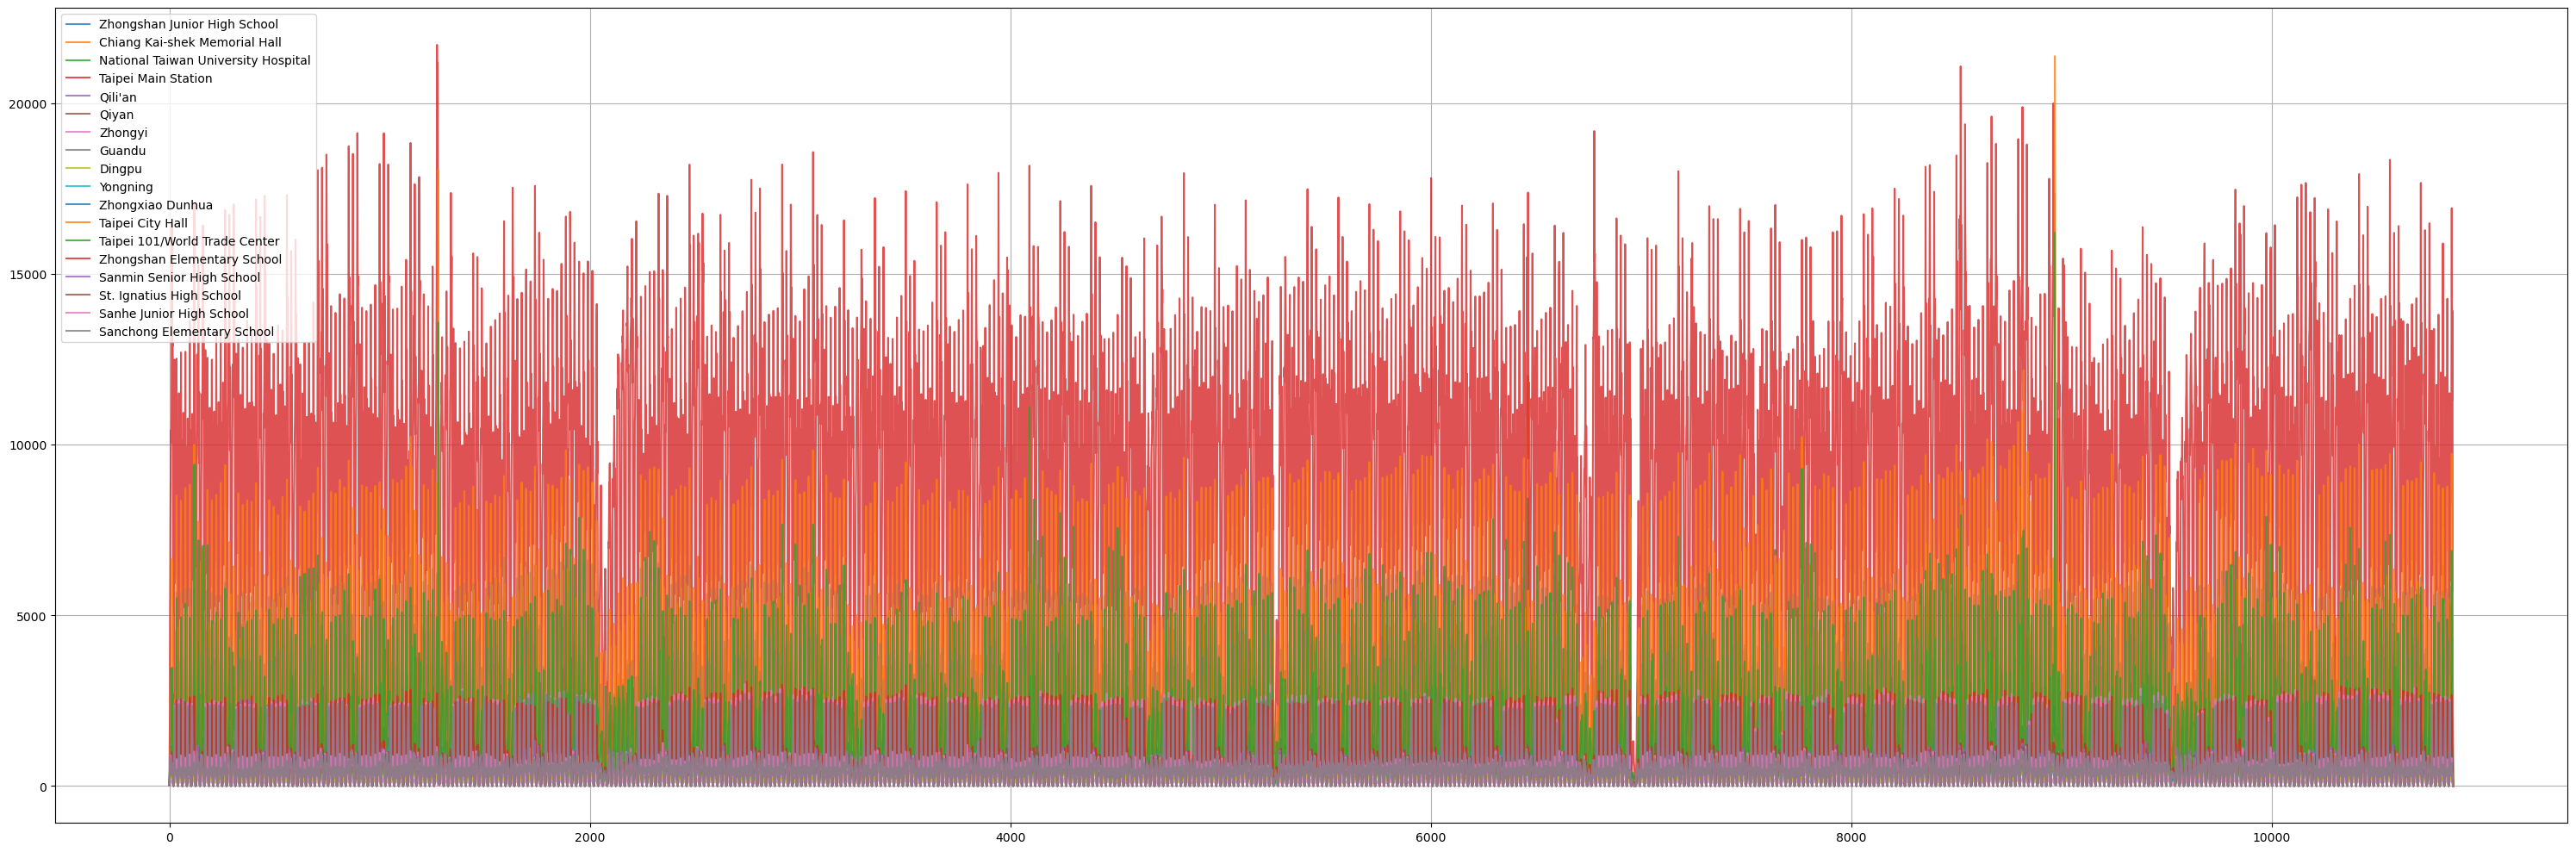

Make Distmat:   0%|          | 0/18 [00:00<?, ?it/s]

{'Zhongshan Junior High School': (695.5190980211689, 620.0), 'Chiang Kai-shek Memorial Hall': (1381.4720662678326, 1263.0), 'National Taiwan University Hospital': (1004.5157846295444, 889.0), 'Taipei Main Station': (7474.564196962724, 7760.0), "Qili'an": (348.74947077772663, 305.0), 'Qiyan': (412.74321214910265, 361.0), 'Zhongyi': (121.21978831109065, 118.0), 'Guandu': (555.5115508513576, 534.0), 'Dingpu': (328.28403129314313, 262.0), 'Yongning': (531.3014265991717, 453.0), 'Zhongxiao Dunhua': (1787.4284399447768, 1278.0), 'Taipei City Hall': (2778.1026231017026, 2253.0), 'Taipei 101/World Trade Center': (1472.1562816382882, 1067.0), 'Zhongshan Elementary School': (752.0935112747354, 686.0), 'Sanmin Senior High School': (557.144132535665, 440.0), 'St. Ignatius High School': (544.8012885411873, 439.0), 'Sanhe Junior High School': (554.284399447768, 423.0), 'Sanchong Elementary School': (538.6731707317073, 427.0)}
Empty dicts: 0


Make Distmat: 100%|██████████| 18/18 [00:17<00:00,  1.06it/s]


In [4]:
pd.set_option('display.max_rows', None)
stations_enter = [station+" enter" for station in stationnames] 
stations_exit = [station+" exit" for station in stationnames] 
columns_all = np.concatenate((np.array(['yyyymm','day','hour']),np.array(stations_enter),np.array(stations_exit)))
allstationdata = loadtaipeidata(main_dir,stationnames)
yeh_usedicts = []
ex = Experiment("PRECIS", [8,40], algyield=True, multivariate=False, downsamplefactor=1)
empty_dicts = 0
labels = []

fig = plt.figure(figsize=(30,10))
traffic = {}

for c in columns_all: # fixed ordering
    if " enter" in c:
        if c[:-6] in example:
            ts_nozscore = np.asarray(allstationdata[c])
            traffic[c[:-6]] = (np.nanmean(ts_nozscore),np.nanmedian(ts_nozscore))
            plt.plot(ts_nozscore,label=c[:-6],alpha=0.8)
            ts = np.asarray(zscore(allstationdata[c],nan_policy='omit'))
            _, idxs = ex.make_exemplar(ts)
            d = []
            for s,e in idxs:
                d.append(ts[s:e])
            if len(d) < 1: 
                empty_dicts += 1 # useful when exploring a dataset, not applicable here
                break
            yeh_usedicts.append(d)
            labels.append(c[:-6])

plt.grid()
plt.legend()
plt.show()

print(traffic)

print("Empty dicts: {}".format(empty_dicts))
yeh_distmat = ex.distmat_from_dicts(yeh_usedicts)

In [5]:
def plot_ac_subroutine(model, fref, label_colors, affinity, linkagetype, methodname, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    fig = plt.figure(figsize=(6,5))
    dendrogram(linkage_matrix, leaf_rotation=90, **kwargs) 
    ax = plt.gca()
    ax.set_title("Method: {}, Affinity: {}, Linkage: {}".format(methodname,affinity,linkagetype))
    ax.tick_params(axis='y', which='major')
    ax.tick_params(axis='x', colors='white', labelsize=8)
    
    xlbls = ax.get_xmajorticklabels()
    for lbl in xlbls:
        lbl.set_color(label_colors[lbl.get_text()])

def plotty_ac(savename, methodname, affinity, linkagetype, X, fref, label_colors):
    def llf(l):
        return "{}".format(fref[l])
    c2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0, affinity=affinity, linkage=linkagetype) # np.mean(X)
    c2 = c2.fit(X)
    plot_ac_subroutine(c2, fref, label_colors, affinity, linkagetype, methodname, orientation="top", leaf_label_func=llf)
    if savename != None:
        plt.savefig(savename, format="svg")
    plt.show()

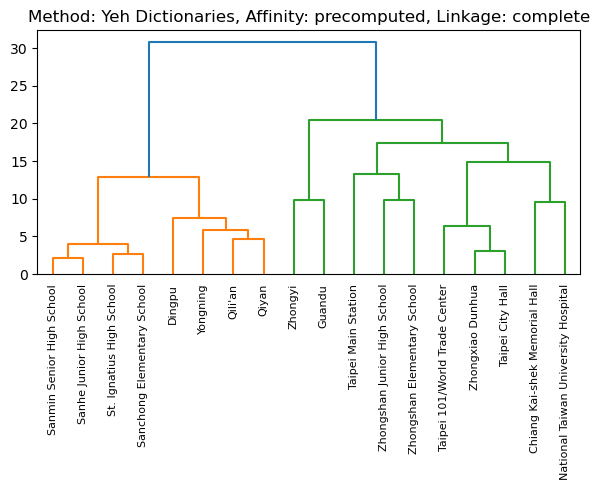

In [6]:
plotty_ac(None, "Yeh Dictionaries", "precomputed", "complete", yeh_distmat, labels, {s:'k' for s in labels})

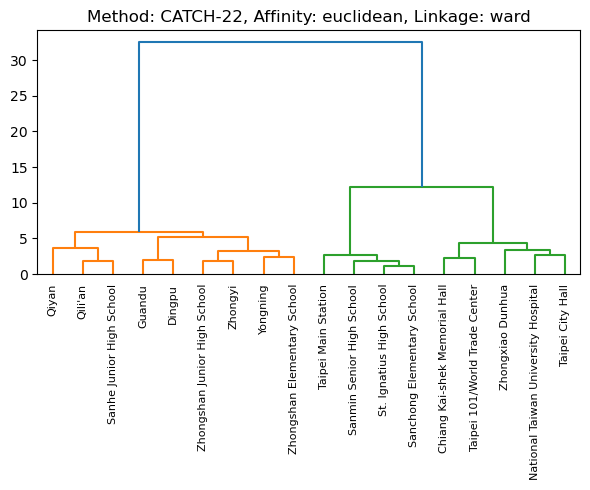

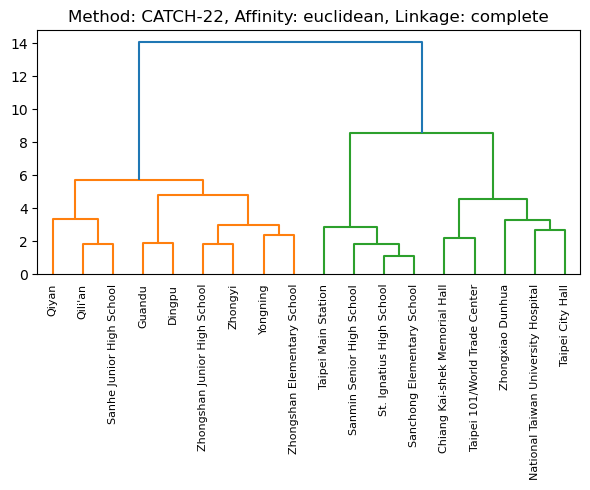

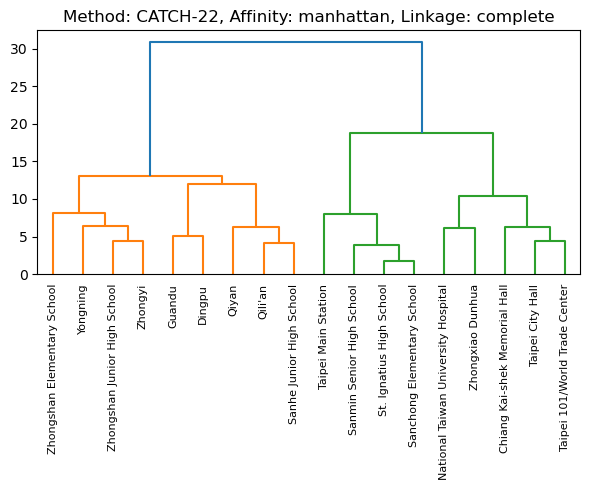

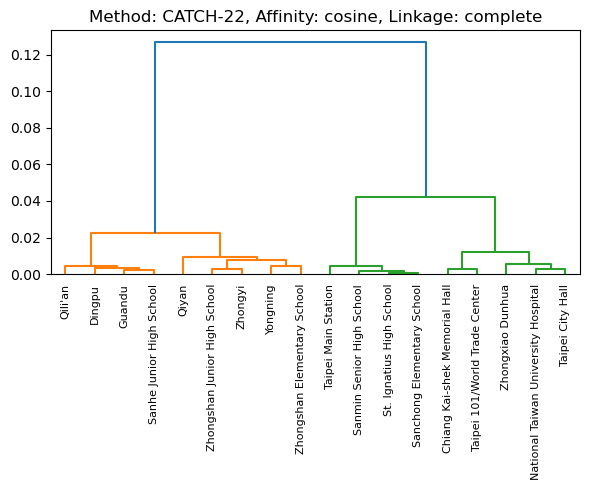

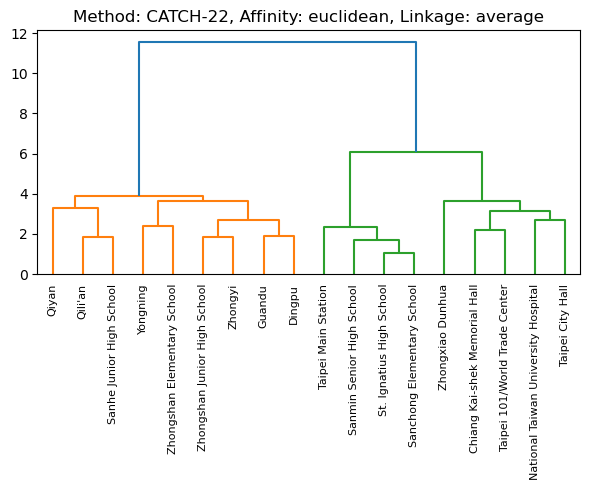

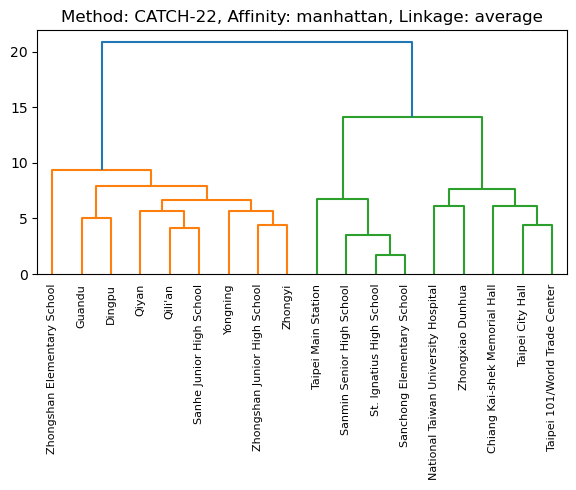

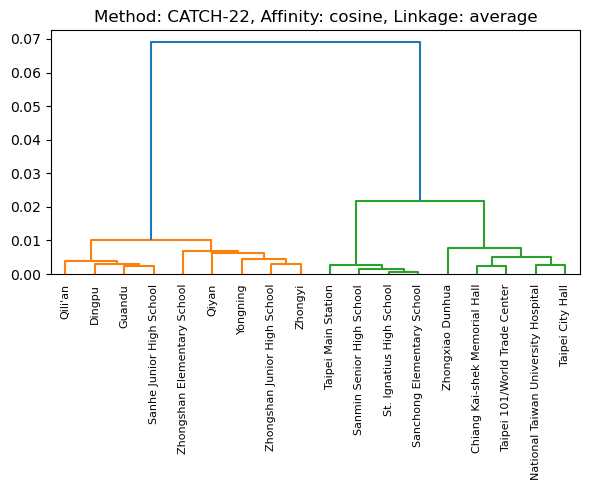

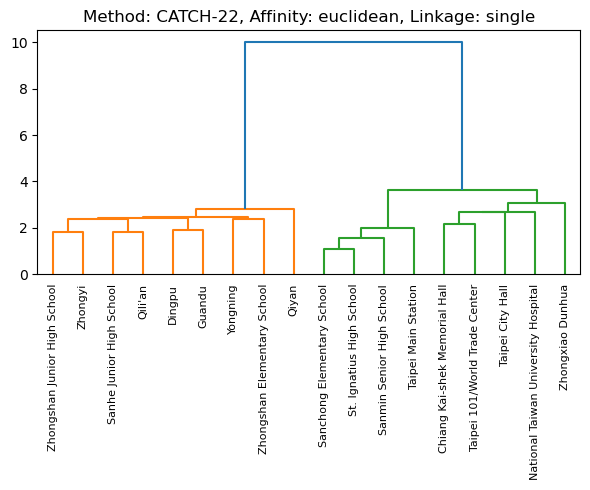

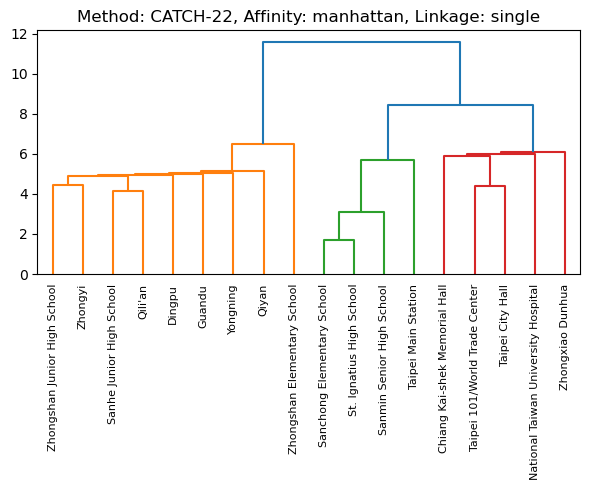

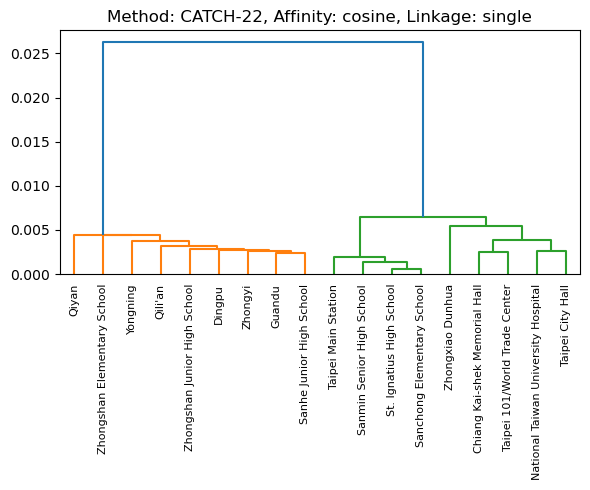

In [7]:
import catch22 # znorm internally
observationvectors = []
for c in columns_all:
    if " enter" in c:
        if c[:-6] in example:
            ts = np.asarray(zscore(allstationdata[c],nan_policy='omit'))
            bad = np.where(np.isnan(ts))
            ts[bad] = np.nanmean(ts)
            fV = catch22.catch22_all(ts)
            fV_values = np.array(fV['values'])
            observationvectors.append(fV_values)

rootsavename = "<save figures to this directory>"
linkagetypes = ['ward','complete', 'average', 'single']
affinities = ['euclidean','manhattan', 'cosine'] #l2 is also accepted, but is redundant
for linkage in linkagetypes:
    for affinity in affinities:
        if linkage == 'ward':
            # plotty_ac(rootsavename+"euclidean{}.svg".format(linkage), "CATCH-22", "euclidean", linkage, observationvectors, subsetstationnames, label_colors)
            plotty_ac(None, "CATCH-22", "euclidean", linkage, observationvectors, labels, {s:'k' for s in labels})
            break
        else:
            # plotty_ac(rootsavename+"{}{}.svg".format(affinity,linkage), "CATCH-22",affinity,linkage,observationvectors,subsetstationnames,label_colors)
            plotty_ac(None, "CATCH-22", affinity, linkage, observationvectors, labels, {s:'k' for s in labels})

Make Distmat: 100%|██████████| 18/18 [00:00<00:00, 1432.92it/s]


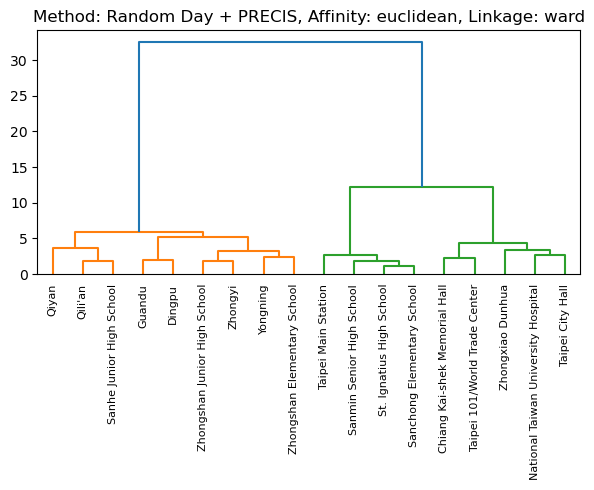

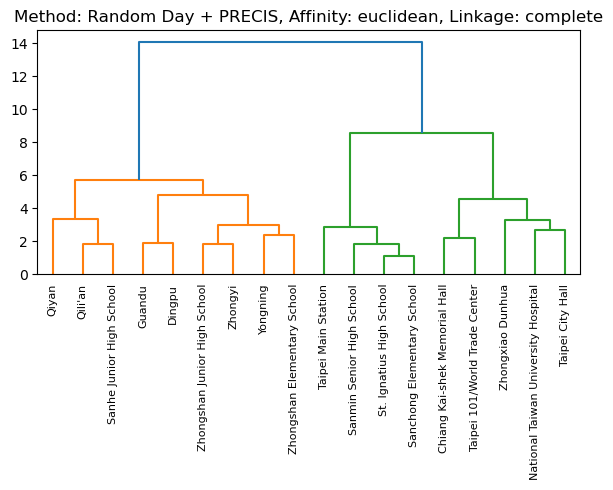

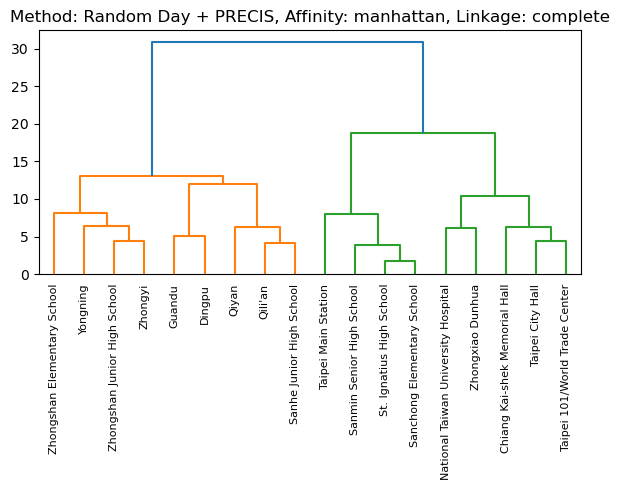

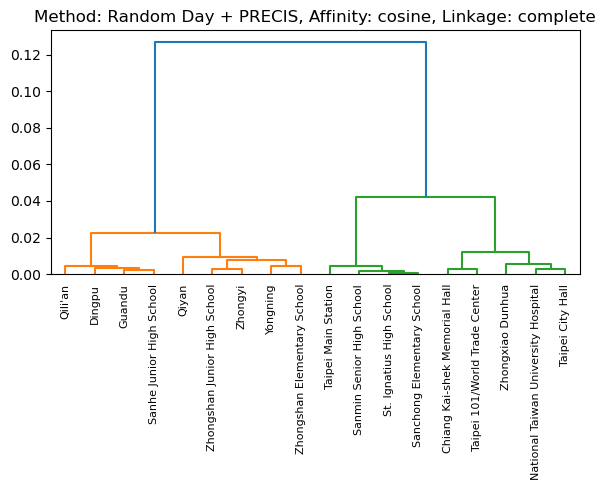

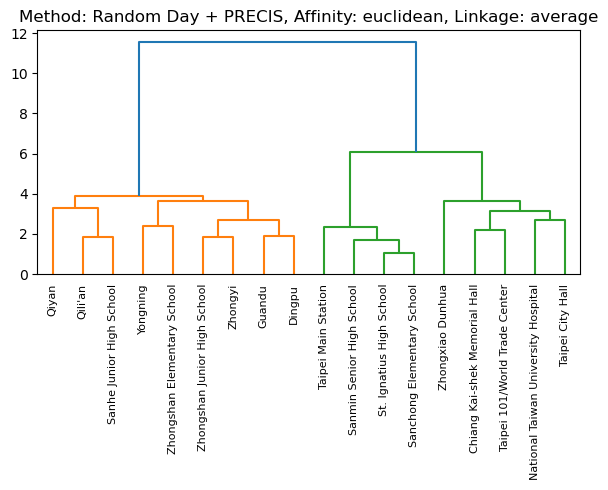

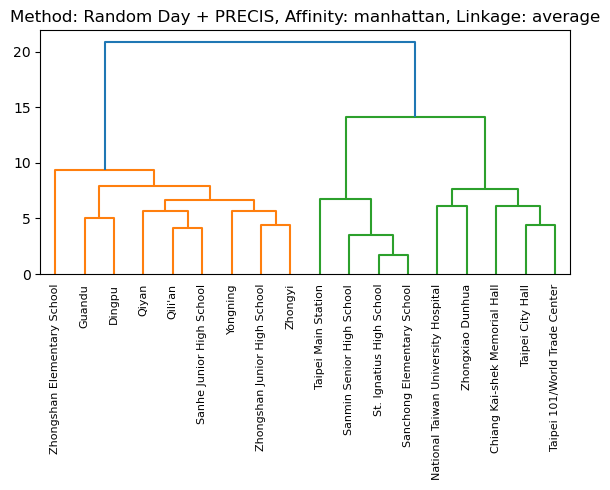

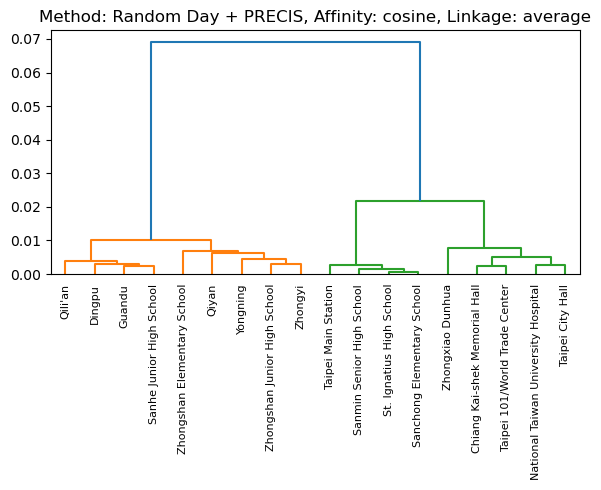

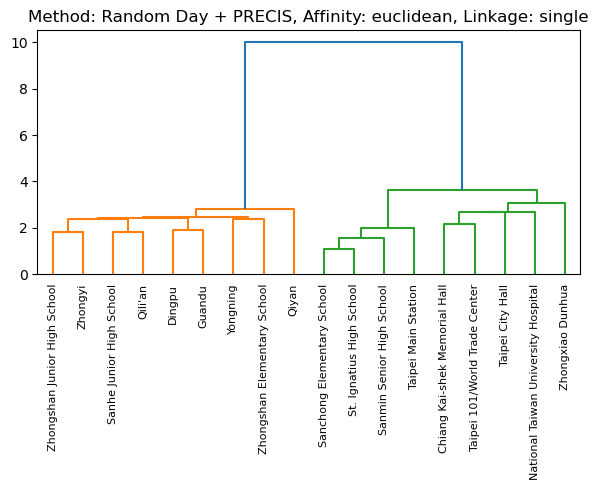

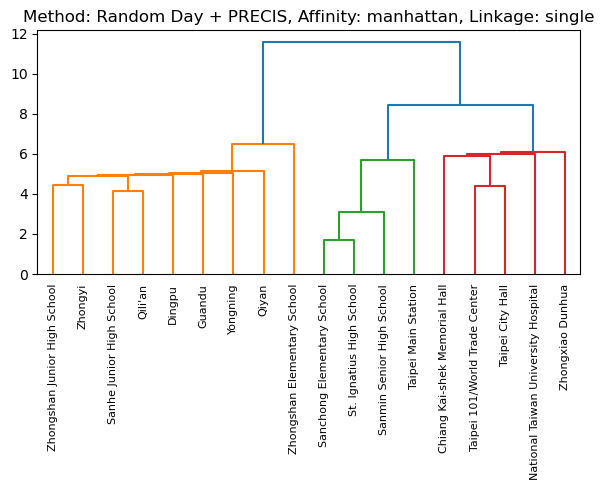

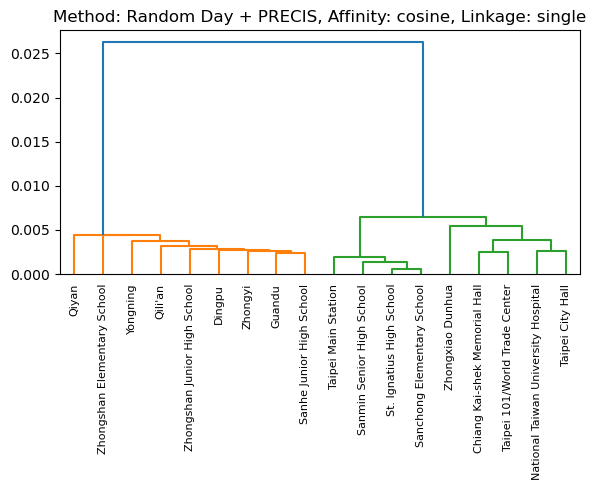

In [12]:
# Random day, not obvious holiday ; need to find a day that is not a holiday
patternmonths = ['201601_enter.mat','201603_enter.mat','201607_enter.mat', '201611_enter.mat'] 
columns = np.concatenate((np.array(['day','hour']),stations_enter))
exemplar = {}
for (root,dirs,files) in os.walk(main_dir):
    for f in files:
        if f in patternmonths:
            data = loadmat(main_dir+"/"+f)
            data = data['data']
            data = data.transpose()
            data = pd.DataFrame(data,columns)
            data = data.transpose()
            if f == "201606_exit.mat":
                exemplar['Mar RF 10-11'] = pd.concat([data[data['day']==10],data[data['day']==11]])
                exemplar['Mar SS 12-13'] = pd.concat([data[data['day']==12],data[data['day']==13]])
            elif f == "201607_exit.mat": 
                exemplar['July SS 16-17'] = pd.concat([data[data['day']==16],data[data['day']==17]])
                exemplar['July MT 18-19'] = pd.concat([data[data['day']==18],data[data['day']==19]])
            elif f == "201601_exit.mat": 
                exemplar['Jan SS 9-10'] = pd.concat([data[data['day']==9],data[data['day']==10]])
                exemplar['Jan MT 11-12'] = pd.concat([data[data['day']==11],data[data['day']==12]])
            elif f == "201611_exit.mat":
                exemplar["Nov SS 19-20"] = pd.concat([data[data['day']==19],data[data['day']==20]])
                exemplar["Nov MT 21-22"] = pd.concat([data[data['day']==21],data[data['day']==22]])

use_dicts = [[] for i in range(len(example))]
label_colors = {station:'k' for station in example}
for pattern in exemplar.keys():
    day = exemplar[pattern]
    for station in range(len(example)):
        k = example[station] + " enter"
        use_dicts[station].append(zscore(np.array(day[k]),nan_policy='omit'))
        
use_dicts = np.asarray(use_dicts)

# make distmat for handcrafted
e = Experiment("PRECIS", [8,40], algyield=True, multivariate=False, downsamplefactor=1)
distmat = e.distmat_from_dicts(use_dicts)

for linkage in linkagetypes:
    for affinity in affinities:
        if linkage == 'ward':
            # plotty_ac(rootsavename+"euclidean{}.svg".format(linkage), "CATCH-22", "euclidean", linkage, observationvectors, subsetstationnames, label_colors)
            plotty_ac(None, "Random Day + PRECIS", "euclidean", linkage, observationvectors, labels, {s:'k' for s in labels})
            break
        else:
            # plotty_ac(rootsavename+"{}{}.svg".format(affinity,linkage), "CATCH-22",affinity,linkage,observationvectors,subsetstationnames,label_colors)
            plotty_ac(None, "Random Day + PRECIS", affinity, linkage, observationvectors, labels, {s:'k' for s in labels})